In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import bernoulli, binom, hypergeom, geom, poisson, uniform, expon, norm

In [ ]:
np.random.seed(42)

samples = {
    "bernoulli": bernoulli.rvs(p = 0.35, size = 10000),
    "binom": binom.rvs(n = 12, p = 0.2, size = 10000),
    "hypergeom": hypergeom.rvs(M = 50, n = 10, N = 7, size = 10000),
    "geometric": geom.rvs(p=0.7, size=10000),
    "poisson": poisson.rvs(mu=5, size=10000),
    "uniform": uniform.rvs(loc=5, scale=25, size=10000),
    "exponential": expon.rvs(scale=1/8, size=10000),
    "normal": norm.rvs(loc=2, scale=5, size=10000),
}

Дискретные


Статистический ряд: bernoulli
   Value  Frequency
0      0       6603
1      1       3397


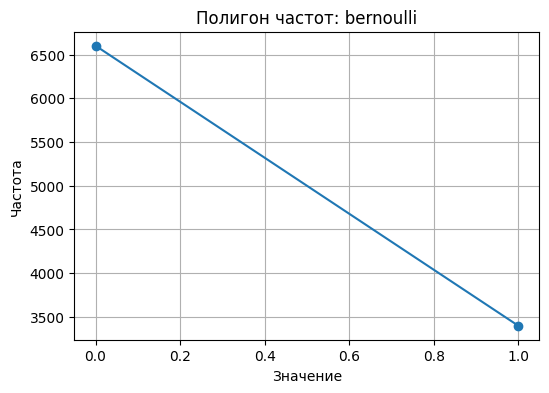

Выборочное среднее: 0.3397
Выборочная дисперсия: 0.2243
Теоретическое ожидание: 0.3500
Теоретическая дисперсия: 0.2275

Статистический ряд: binom
   Value  Frequency
0      0        683
1      1       2015
2      2       2842
3      3       2370
4      4       1341
5      5        533
6      6        166
7      7         45
8      8          5


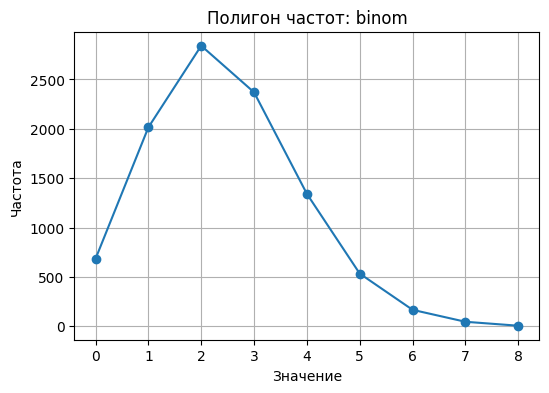

Выборочное среднее: 2.4189
Выборочная дисперсия: 1.9486
Теоретическое ожидание: 0.3500
Теоретическая дисперсия: 0.2275

Статистический ряд: hypergeom
   Value  Frequency
0      0       1859
1      1       3837
2      2       3043
3      3       1042
4      4        189
5      5         29
6      6          1


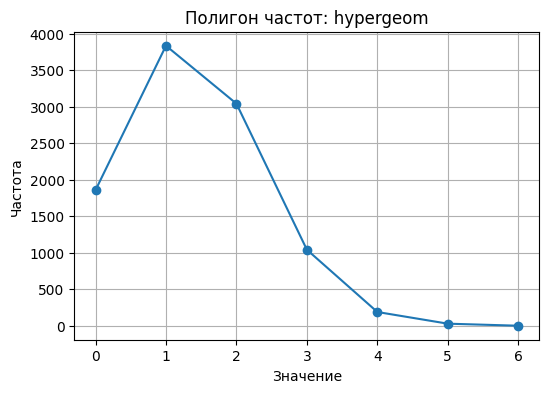

Выборочное среднее: 1.3956
Выборочная дисперсия: 0.9696
Теоретическое ожидание: 1.4000
Теоретическая дисперсия: 0.9829

Статистический ряд: geometric
   Value  Frequency
0      1       7078
1      2       2071
2      3        581
3      4        200
4      5         44
5      6         16
6      7          8
7      8          1
8      9          1


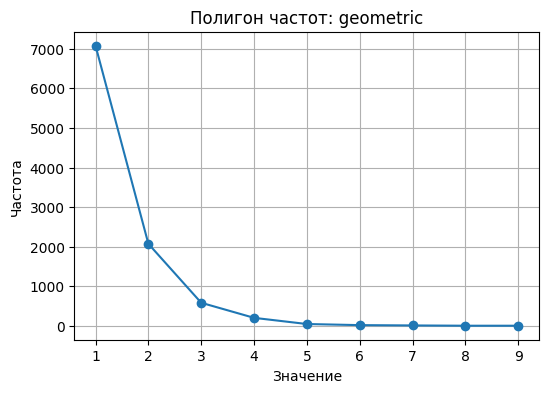

Выборочное среднее: 1.4152
Выборочная дисперсия: 0.5977
Теоретическое ожидание: 1.4286
Теоретическая дисперсия: 0.6122

Статистический ряд: poisson
    Value  Frequency
0       0         66
1       1        343
2       2        854
3       3       1381
4       4       1710
5       5       1733
6       6       1502
7       7       1056
8       8        680
9       9        356
10     10        197
11     11         66
12     12         35
13     13         17
14     14          2
15     15          1
16     20          1


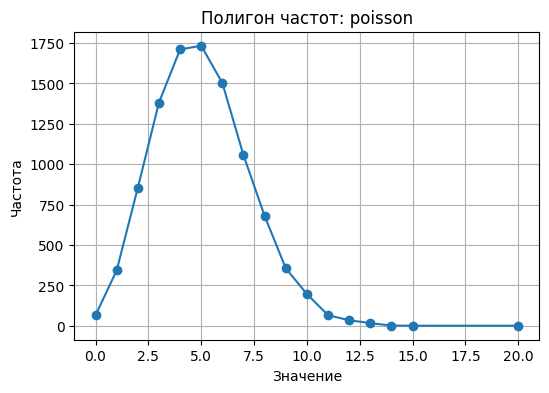

Выборочное среднее: 5.0147
Выборочная дисперсия: 5.0194
Теоретическое ожидание: 5.0000
Теоретическая дисперсия: 5.0000


In [ ]:
discrete_dists = ['bernoulli', 'binom', 'hypergeom', 'geometric', 'poisson']

for name in discrete_dists:
    sample = samples[name]
    value_counts = pd.Series(sample).value_counts().sort_index()
    df = pd.DataFrame({'Value': value_counts.index, 'Frequency': value_counts.values})
    print(f"\nСтатистический ряд: {name}")
    print(df)

    # Полигон частот
    plt.figure(figsize=(6, 4))
    plt.plot(df['Value'], df['Frequency'], marker='o')
    plt.title(f'Полигон частот: {name}')
    plt.xlabel('Значение')
    plt.ylabel('Частота')
    plt.grid(True)
    plt.show()

    # Статистика
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=1)
    print(f"Выборочное среднее: {sample_mean:.4f}")
    print(f"Выборочная дисперсия: {sample_var:.4f}")

    # Теоретические значения
    if name == 'bernoulli':
        mean, var = 0.35, 0.35 * (1 - 0.35)
    elif name == 'binomial':
        mean, var = 12 * 0.2, 12 * 0.2 * 0.8
    elif name == 'hypergeom':
        mean = 7 * 10 / 50
        var = 7 * 10 * (50 - 10) * (50 - 7) / (50**2 * 49)
    elif name == 'geometric':
        mean = 1 / 0.7
        var = (1 - 0.7) / (0.7**2)
    elif name == 'poisson':
        mean, var = 5, 5

    print(f"Теоретическое ожидание: {mean:.4f}")
    print(f"Теоретическая дисперсия: {var:.4f}")


Непрерывные


Статистический ряд по интервалам: uniform
          Interval  Frequency
0     [5.00; 6.14)        464
1     [6.14; 7.28)        429
2     [7.28; 8.41)        449
3     [8.41; 9.55)        449
4    [9.55; 10.68)        461
5   [10.68; 11.82)        455
6   [11.82; 12.95)        416
7   [12.95; 14.09)        470
8   [14.09; 15.23)        478
9   [15.23; 16.36)        445
10  [16.36; 17.50)        460
11  [17.50; 18.63)        455
12  [18.63; 19.77)        471
13  [19.77; 20.91)        465
14  [20.91; 22.04)        439
15  [22.04; 23.18)        477
16  [23.18; 24.31)        479
17  [24.31; 25.45)        401
18  [25.45; 26.58)        428
19  [26.58; 27.72)        504
20  [27.72; 28.86)        469
21  [28.86; 29.99)        436


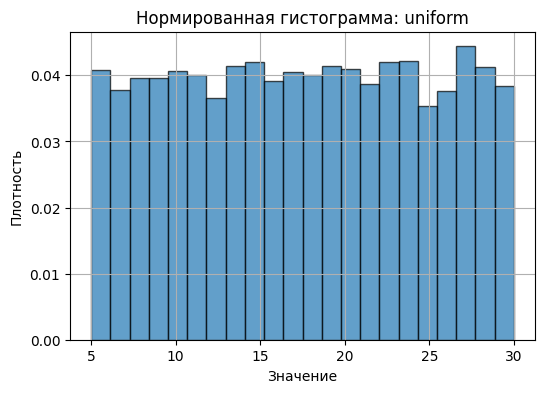

Выборочное среднее: 17.5364
Выборочная дисперсия: 51.7535
Теоретическое ожидание: 17.5000
Теоретическая дисперсия: 52.0833

Статистический ряд по интервалам: exponential
         Interval  Frequency
0    [0.00; 0.01)        976
1    [0.01; 0.02)        796
2    [0.02; 0.04)        733
3    [0.04; 0.05)        676
4    [0.05; 0.06)        703
..            ...        ...
107  [1.31; 1.32)          0
108  [1.32; 1.34)          0
109  [1.34; 1.35)          0
110  [1.35; 1.36)          0
111  [1.36; 1.37)          1

[112 rows x 2 columns]


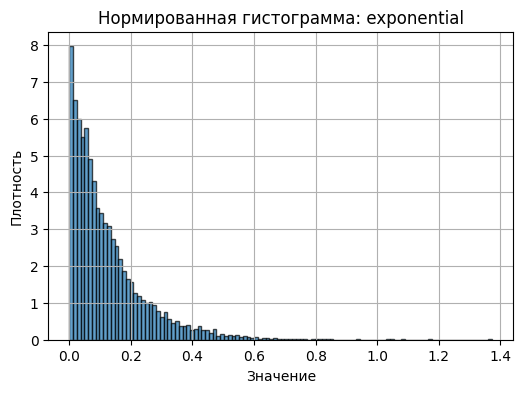

Выборочное среднее: 0.1241
Выборочная дисперсия: 0.0156
Теоретическое ожидание: 0.1250
Теоретическая дисперсия: 0.0156

Статистический ряд по интервалам: normal
            Interval  Frequency
0   [-16.91; -16.29)          1
1   [-16.29; -15.66)          1
2   [-15.66; -15.04)          2
3   [-15.04; -14.42)          2
4   [-14.42; -13.80)          2
..               ...        ...
60    [20.38; 21.01)          0
61    [21.01; 21.63)          1
62    [21.63; 22.25)          0
63    [22.25; 22.87)          0
64    [22.87; 23.49)          2

[65 rows x 2 columns]


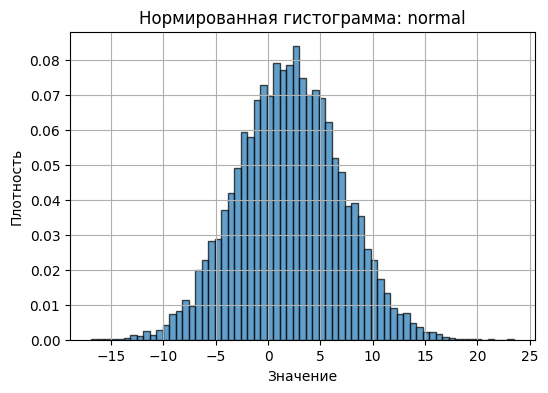

Выборочное среднее: 2.0555
Выборочная дисперсия: 24.7624
Теоретическое ожидание: 2.0000
Теоретическая дисперсия: 25.0000


In [ ]:
continuous_dists = ['uniform', 'exponential', 'normal']

for name in continuous_dists:
    sample = samples[name]

    # Интервалы
    bins = np.histogram_bin_edges(sample, bins='auto')
    counts, edges = np.histogram(sample, bins=bins)
    intervals = [f"[{edges[i]:.2f}; {edges[i+1]:.2f})" for i in range(len(edges)-1)]
    df = pd.DataFrame({'Interval': intervals, 'Frequency': counts})
    print(f"\nСтатистический ряд по интервалам: {name}")
    print(df)

    # Нормированная гистограмма (PDF)
    plt.figure(figsize=(6, 4))
    plt.hist(sample, bins=bins, density=True, alpha=0.7, edgecolor='black')
    plt.title(f'Нормированная гистограмма: {name}')
    plt.xlabel('Значение')
    plt.ylabel('Плотность')
    plt.grid(True)
    plt.show()

    # Статистика
    sample_mean = np.mean(sample)
    sample_var = np.var(sample, ddof=1)
    print(f"Выборочное среднее: {sample_mean:.4f}")
    print(f"Выборочная дисперсия: {sample_var:.4f}")

    # Теоретические значения
    if name == 'uniform':
        a, b = 5, 30
        mean = (a + b) / 2
        var = ((b - a) ** 2) / 12
    elif name == 'exponential':
        lam = 8
        mean = 1 / lam
        var = 1 / (lam ** 2)
    elif name == 'normal':
        mean, var = 2, 25

    print(f"Теоретическое ожидание: {mean:.4f}")
    print(f"Теоретическая дисперсия: {var:.4f}")
